In [1]:
import copy

# import cProfile
import itertools

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.stats as st

import neuro_op as nop

In [2]:
nop.plot_setup()

In [3]:
# Reference input, to be adapted, just here for reference
input = dict(
    #    G=nop.build_random_network(N_nodes=100, N_neighbours=50),
    G=nx.empty_graph(150),
    llf_nodes=st.norm,
    params_node=dict(
        loc=0,
        scale=1,
    ),
    sd_llf=1,
    llf_world=st.norm,
    params_world=dict(
        loc=0,
        scale=1,
    ),
    h=1,
    r=0,
    t0=0,
    t_max=1e2,
    t_sample=1,
    sampling=True,
    actInf=True,
    init_rngs=False,
    seed=False,
)

In [4]:
# i.g. sourced form
# 1. Dunbar 1993 (BEHAVIORAL AND BRAIN SCIENCES (1993) 16:4)
# 2. Dunbar 2008, https://doi.org/10.1037/1089-2699.12.1.7
# 3. Yellow (June 25, 2018)
# (4. Lazily extrapolate N, nn from (x_{n+1})_n = n*ln(n) with n_0 = )

nn = [10, (5, 15)]  # from 2
N = [
    1,  # for simple understanding
    2,  # for simple understanding
    150,  # from 1
    500,  # from 3
]

# MA0 )
nn_arr = np.round(
    np.concatenate(([1], np.arange(2, 11, 2), np.arange(30, 150, 30), [149])), 0
)

# MA1 )
sd_llf_arr = np.arange(0.25, 2.1, 0.25)
nn_arr = np.arange(2.5, 21, 2.5)

# MA2 )
sd_arr = np.arange(0.25, 2.1, 0.25)

# MA3 )
mu_arr = np.arange(0, 10.1, 2)
sd_arr = np.arange(1, 10.1, 1.5)
r_arr = np.arange(1, 10.1, 1.5)

In [5]:
# out1 = nop.run_ConjMu(**nop.input_ref_ConjMu)
out1 = nop.run_ConjMu(**input)

1.0003141435446774
3.9816811044725755
1.0028810045287813
1.378717061436104
1.0188445235012786
1.1948886941532681
1.616102224123936
1.1399482321020122
1.0038656427106998
1.1499079768026668
1.0041287673530865
1.018557986779031
1.1807486062780614
1.0028888890991194
1.0329861562209426
1.0338538304558427
1.1969900663303987
1.0471249367346613
1.007358972475209
1.4334741550381773
1.3829849203217586
1.1414369631992298
1.0347800230533228
1.1439640738000116
1.1725796915945623
3.456577602048555
1.0044788265920161
1.0615184522143402
1.0077473946132054
1.339096206998856
3.567507482329061
3.2567906368305994
1.0330606071585384
1.4047581026290656
1.0650204510728871
1.8966282646169028
1.144689818654885
1.5475132913703755
1.088035711143045
1.0012541255510954
1.159098396181531
3.818025304145988
1.5615251752620942
1.0779567150486329
1.0604001608487061
1.9588697640421335
1.8117587237146875
17.719205150327667
1.225369628136655
1.0061942403598543
1.0011006283738497
1.8192731787512202
1.2471447323615739
1.571

In [6]:
nop.export_hdf5(out1, "test.h5")

In [7]:
n = (st.norm.pdf(loc=0, scale=0.5, x=0),)
x = (st.norm.pdf(loc=0, scale=0.5, x=1),)
print(np.emath.logn(n, x))
np.log(x) / np.log(n)

[9.85773515]


array([9.85773515])

In [8]:
out1 = nop.import_hdf5("test.h5", True, True, True)

## Data analysis

Random data analysis test notebook of steps later used in thorough analysis.


#### Data analysis 1

Firstly, extract output values for further analysis:

In [9]:
for i in out1.keys():
    print(i)

world
G
N_events
t_end
t_start
t_exec
seed
nodesConjMu
mu_nodes
sd_nodes
kl_divs



Each node's posteriors are plotted. One should see nodes' posteriors of model parameters (in this case, $\mu$), to converge around the true value. If not, nodes may need more information to converge ($\rightarrow$ increase $t_{max}, h$).


(array([ 2.,  2.,  8.,  8.,  6., 20., 13., 17., 22., 15.,  5.,  6.,  8.,
         5.,  2.,  5.,  4.,  1.,  0.,  1.]),
 array([0.32604155, 0.34276601, 0.35949047, 0.37621493, 0.3929394 ,
        0.40966386, 0.42638832, 0.44311279, 0.45983725, 0.47656171,
        0.49328618, 0.51001064, 0.5267351 , 0.54345956, 0.56018403,
        0.57690849, 0.59363295, 0.61035742, 0.62708188, 0.64380634,
        0.6605308 ]),
 <BarContainer object of 20 artists>)

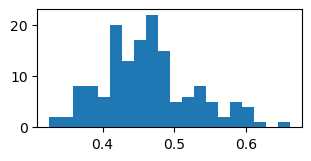

In [10]:
sigmas = []
for i in out1["nodesConjMu"]:
    sigmas += [i.params_node["scale"]]
fig, ax = plt.subplots()
ax.hist(sigmas, bins=20)

[[-1.89050489e+00 -1.00000000e+00  8.67555745e-01]
 [ 1.06813510e+00 -1.00000000e+00  1.04612754e+00]
 [-2.19923557e-01 -1.00000000e+00  1.15575020e+00]
 [ 5.81225136e-02 -1.00000000e+00  2.71174980e+00]
 [-4.43469314e-01 -1.00000000e+00  3.18213604e+00]
 [-2.77866909e-01 -1.00000000e+00  4.93323595e+00]
 [-9.16183279e-01 -1.00000000e+00  6.16326943e+00]
 [ 7.41846065e-01 -1.00000000e+00  6.59275964e+00]
 [-6.75716687e-01 -1.00000000e+00  7.40725346e+00]
 [ 2.06509319e+00 -1.00000000e+00  8.33213551e+00]
 [ 1.38840177e+00 -1.00000000e+00  1.04990321e+01]
 [ 7.05488841e-01 -1.00000000e+00  1.07028760e+01]
 [-1.24250923e+00 -1.00000000e+00  1.17273802e+01]
 [-5.97376595e-01 -1.00000000e+00  1.19726015e+01]
 [ 9.65514514e-01 -1.00000000e+00  1.27193214e+01]
 [ 1.79701514e+00 -1.00000000e+00  1.28529466e+01]
 [-6.21200619e-01 -1.00000000e+00  1.40820754e+01]
 [-2.15467947e-02 -1.00000000e+00  1.43491060e+01]
 [-9.16664913e-01 -1.00000000e+00  1.46459636e+01]
 [ 5.28781087e-01 -1.00000000e+

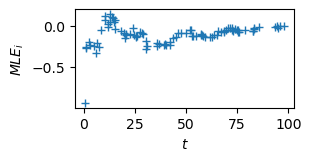

In [11]:
# Implement external sampling routine (or rather test if feasible)
k = 0
nody = out1["nodesConjMu"][k]
# mu_nody = np.array(out1["mu_nodes"])[:, k][1:]
#
fig, ax = plt.subplots()
# ax.plot(
#    np.arange(input["t0"], input["t_max"], input["t_sample"]),
#    mu_nody,
# )

mu, sig = input["params_node"].values()
sd_llf = input["sd_llf"]
x_in = np.array(nody.diary_in)
post_mu = x_in[:, 0]
post_sig = np.zeros_like(post_mu)

i = -1
post_mu[i], post_sig[i] = mu, sig
for i, _ in enumerate(x_in):
    post_mu[i] = (post_sig[i - 1] ** 2 * x_in[i, 0] + sd_llf**2 * post_mu[i - 1]) / (
        post_sig[i - 1] ** 2 + sd_llf**2
    )
    post_sig[i] = (1 / post_sig[i - 1] ** 2 + 1 / sd_llf**2) ** (-0.5)

# ax.set_ylim(-1, 1)
ax.plot(x_in[:, 2], post_mu, "+", alpha=1)
ax.set_xlabel("$t$")
ax.set_ylabel("$MLE_i$")

print(nody.diary_in)
# fig.savefig("graphics-output/TMP-mu_N1.png", dpi=1500)

(101, 150)
101


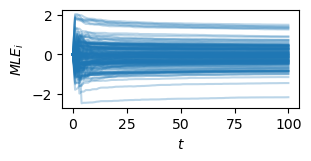

In [12]:
mu_arr = np.array(out1["mu_nodes"])
print(mu_arr.shape)
x = np.arange(input["t0"], input["t_max"] + input["t_sample"], input["t_sample"])
print(len(x))
fig, ax = plt.subplots()
for i, mu in enumerate(mu_arr.T):
    ax.plot(x, mu, alpha=0.3, label=f"$\mu_{i}$", color="tab:blue")
    ax.set_xlabel("$t$")
    ax.set_ylabel("$MLE_i$")
# ax.set_ylim(-100, 100)
# ax.set_yscale("log")
# ax.loglog()
# ax.legend()
# fig.savefig("./graphics-output/TMP-mu_nodes.png", dpi=1500)

#### Data analysis 2

(1, 100.0)

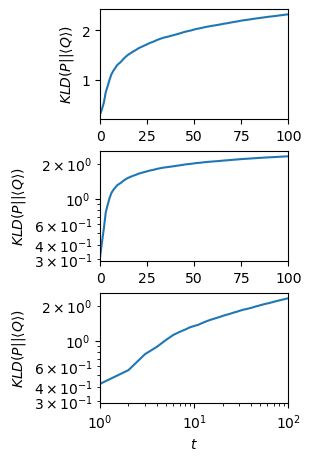

In [13]:
# for i in N_iter:
#    plt.plot(input["t_sample"] * np.arange(0, kld.shape[0]), kld[:, i, ])
kld = np.array(out1["kl_divs"])
fig, ax = plt.subplots(3, 1, constrained_layout=True, figsize=(3, 4.5))
x = input["t_sample"] * np.arange(0, kld.shape[0])
for i, _ in enumerate(ax):
    ax[i].plot(
        x,  # input["t_sample"] * np.arange(0, kld.shape[0]),
        kld.mean(axis=1),
        label="$KLD_i$",
    )
    ax[i].set_ylabel(r"$KLD(P||\langle Q \rangle )$")
    ax[i].set_xlim(0, x[-1])
ax[2].set_xlabel("$t$")
ax[1].set_yscale("log")
ax[2].loglog()
ax[2].set_xlim(input["t_sample"], input["t_max"])
# fig.savefig("./graphics-output/TMP-KLD.png", dpi=1500)

(101, 150)


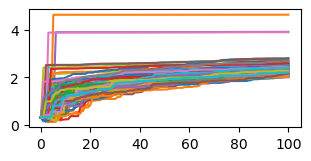

In [14]:
# for i in N_iter:
#    plt.plot(input["t_sample"] * np.arange(0, kld.shape[0]), kld[:, i, ])
kld = np.array(out1["kl_divs"])
print(kld.shape)
fig, ax = plt.subplots(constrained_layout=True, figsize=(3, 1.5))
for i, _ in enumerate(kld.T):
    ax.plot(
        input["t_sample"] * np.arange(0, kld.shape[0]),
        kld[:, i],
        label="avg",
    )
# plt.loglog()
# plt.ylim(0, 2)